In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# <b/> Data Visualization

Percentage of Women survived:  74.20382165605095
Percentage of Men survived:  18.890814558058924


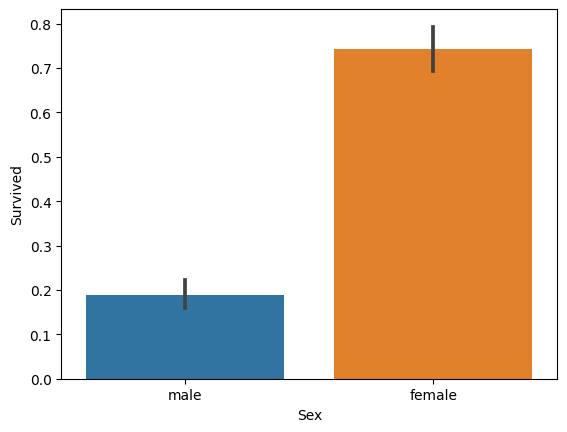

In [8]:
# survival based on gender
sns.barplot(x='Sex', y='Survived',data=train)

print('Percentage of Women survived: ', train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)

print('Percentage of Men survived: ', train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 survived:  62.96296296296296
Percentage of Pclass = 2 survived:  47.28260869565217
Percentage of Pclass = 3 survived:  24.236252545824847


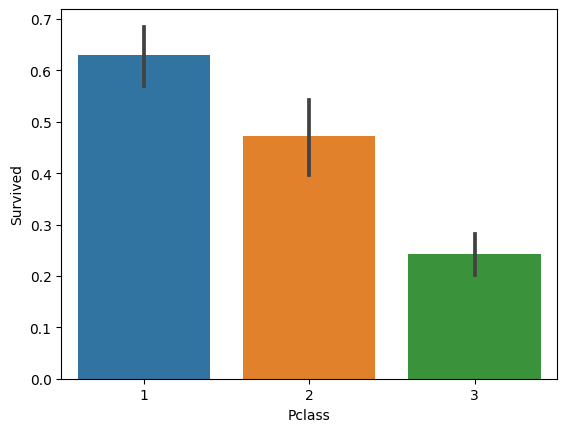

In [9]:
# survival based on Pclass
sns.barplot(x='Pclass', y='Survived',data=train)

print('Percentage of Pclass = 1 survived: ', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)

print('Percentage of Pclass = 2 survived: ', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)

print('Percentage of Pclass = 3 survived: ', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

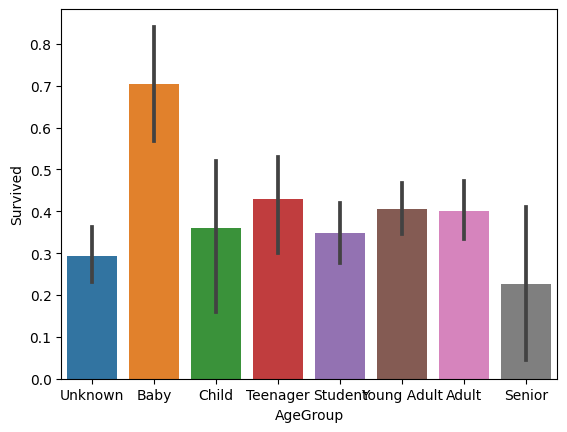

In [10]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'],bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'],bins, labels=labels)

sns.barplot(x='AgeGroup', y='Survived', data=train)

In [11]:
# dropping irrelevant columns
train = train.drop(['Ticket','Fare','Cabin'], axis=1)
test = test.drop(['Ticket','Fare','Cabin'], axis=1)

# <b/> Dealing with Missing Values

In [12]:
print('Number of people Embarking on Southampton(S): ', )
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

print('Number of people Embarking on Cherbourg(C): ', )
cherbourg = train[train['Embarked'] == 'C'].shape[0]
print(cherbourg)

print('Number of people Embarking on Queenstown(Q): ', )
queenstown = train[train['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of people Embarking on Southampton(S): 
644
Number of people Embarking on Cherbourg(C): 
168
Number of people Embarking on Queenstown(Q): 
77


In [13]:
train = train.fillna({'Embarked': 'S'})

In [14]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [15]:
combine = [train,test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [17]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Major','Rev','Col','Don','Dr',
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [18]:
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [22]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode()
miss_age = train[train['Title'] == 2]['AgeGroup'].mode()
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode()
master_age = train[train['Title'] == 4]['AgeGroup'].mode()
royal_age = train[train['Title'] == 5]['AgeGroup'].mode()
rare_age = train[train['Title'] == 6]['AgeGroup'].mode()

age_title_map = {1:'Young Adult', 2:'Student', 3:'Adult', 4:'Baby', 5:'Adult', 6:'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]
        
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [23]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [24]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Embarked         object
AgeGroup       category
Title             int64
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

transform = ['Sex', 'Embarked', 'AgeGroup']

for i in transform:
    train[i] = le.fit_transform(train[i])

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


In [28]:
for i in transform:
    test[i] = le.fit_transform(test[i])

In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,3,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,6,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,4,3


In [30]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

# <b/> Machine Learning Model

In [33]:
X_train = train.drop(['PassengerId','Survived'], axis=1)
y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis=1)

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [35]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [36]:
# submission 
ids = test['PassengerId']

output = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
output.to_csv('submission.csv', index=False)